In [1]:
import herbie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_temp(hour):
    
    # In the future
    fxx = 0 if hour<=20 else hour-20
    
    # Ajust to UTC (Maine is UTC-4)
    day='2024-05-30 ' if hour<20 else '2024-05-31 '
    hour=hour+4 if hour<20 else 0

    # Herbie object for the HRRR model 6-hr surface forecast
    H = herbie.Herbie(
      day + str(hour) + ':00',
      model='hrrr', 
      product='sfc', # 2D surface level fields
      fxx=fxx,
    )

    # Get dataset
    ds = H.xarray("TMP:2 m")

    # Get a specific point by coordinates
    test = herbie.accessors.HerbieAccessor(ds)
    latitude_value = 45.36
    longitude_value = -68.97
    points = pd.DataFrame({'latitude': [latitude_value], 'longitude': [longitude_value]})
    temperature = test.pick_points(points, method='nearest')['t2m'].values[0] 
    
    return temperature

In [3]:
wf_herbie = []
for hour in range(24):
    try:
        wf_herbie.append(get_temp(hour))
    except:
        wf_herbie.append(np.nan)

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-30 04:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-30 05:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-30 06:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-30 07:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-30 08:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-30 09:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-30 10:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-30 11:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-30 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-30 13:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-30 14:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr 

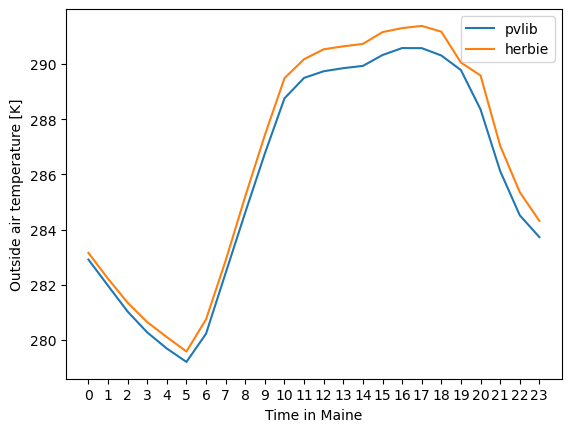

In [5]:
wf_pvlib = [9.910003662109375, 8.963134765625, 8.0264892578125, 7.2698974609375, 6.686676025390625, 6.20159912109375, 7.225433349609375, 
            9.42828369140625, 11.62158203125, 13.758331298828125, 15.75408935546875, 16.494659423828125, 16.73565673828125, 16.847991943359375, 
            16.929443359375, 17.32318115234375, 17.57550048828125, 17.572601318359375, 17.306396484375, 16.7760009765625, 15.352325439453125, 
            13.12091064453125, 11.516937255859375, 10.724700927734375]
wf_pvlib = [x+273 for x in wf_pvlib]

plt.plot(wf_pvlib, label='pvlib')
plt.plot(wf_herbie,label='herbie')
plt.xticks(list(range(len(wf_herbie))))
plt.xlabel('Time in Maine')
plt.ylabel('Outside air temperature [K]')
plt.legend()
plt.show()